### Importamos librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

### Cargamos los datos

In [5]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

In [6]:
X_train_corr_scal, X_test_corr_scal = func.escala_estandar(train = X_train_corr, test = X_test_corr)
X_train_scal, X_test_scal = func.escala_estandar(train = X_train, test = X_test)

### Creamos nuestro modelo para utilizarlo con todos los datos

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation = 'relu',
                      input_shape = X_train_scal.shape[1:]),
    keras.layers.Dense(100, activation = 'relu'),

    keras.layers.Dense(100, activation = 'relu'),
                                      
    keras.layers.Dense(1, activation = 'relu')
])

model.compile(loss = "mean_squared_error",
             optimizer = "adam",
             metrics = ["mae","mse"])

### Entrenamos el modelo

In [8]:
history = model.fit(X_train_scal,
                   y_train,
                   epochs = 1000,
                   validation_split = 0.2,
                   batch_size = 64,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/1000
65/65 [==============================] - 1s 3ms/step - loss: 6.9018 - mae: 1.2989 - mse: 6.9018 - val_loss: 2.3427 - val_mae: 0.8577 - val_mse: 2.3427
Epoch 2/1000
65/65 [==============================] - 0s 1ms/step - loss: 2.3505 - mae: 0.8644 - mse: 2.3505 - val_loss: 1.4851 - val_mae: 0.7255 - val_mse: 1.4851
Epoch 3/1000
65/65 [==============================] - 0s 1ms/step - loss: 1.7907 - mae: 0.8013 - mse: 1.7907 - val_loss: 1.3483 - val_mae: 0.7164 - val_mse: 1.3483
Epoch 4/1000
65/65 [==============================] - 0s 1ms/step - loss: 1.6691 - mae: 0.7972 - mse: 1.6691 - val_loss: 1.2704 - val_mae: 0.7048 - val_mse: 1.2704
Epoch 5/1000
65/65 [==============================] - 0s 1ms/step - loss: 1.6045 - mae: 0.7810 - mse: 1.6045 - val_loss: 1.2121 - val_mae: 0.6845 - val_mse: 1.2121
Epoch 6/1000
65/65 [==============================] - 0s 1ms/step - loss: 1.5065 - mae: 0.7547 - mse: 1.5065 - val_loss: 1.2788 - val_mae: 0.6908 - val_mse: 1.2788
Epoch 7/1000
65/

### Realizamos la predicción

In [9]:
pred_rn = model.predict(X_test_scal)

### Observamos lo resultados

In [10]:
func.muestra_metricas(data = y_test, data_pred = pred_rn)

MAE: 0.7456548540686914
MSE: 1.513844134326647
RMSE: 1.2303837345830964
R2 score: 0.8887827559150896


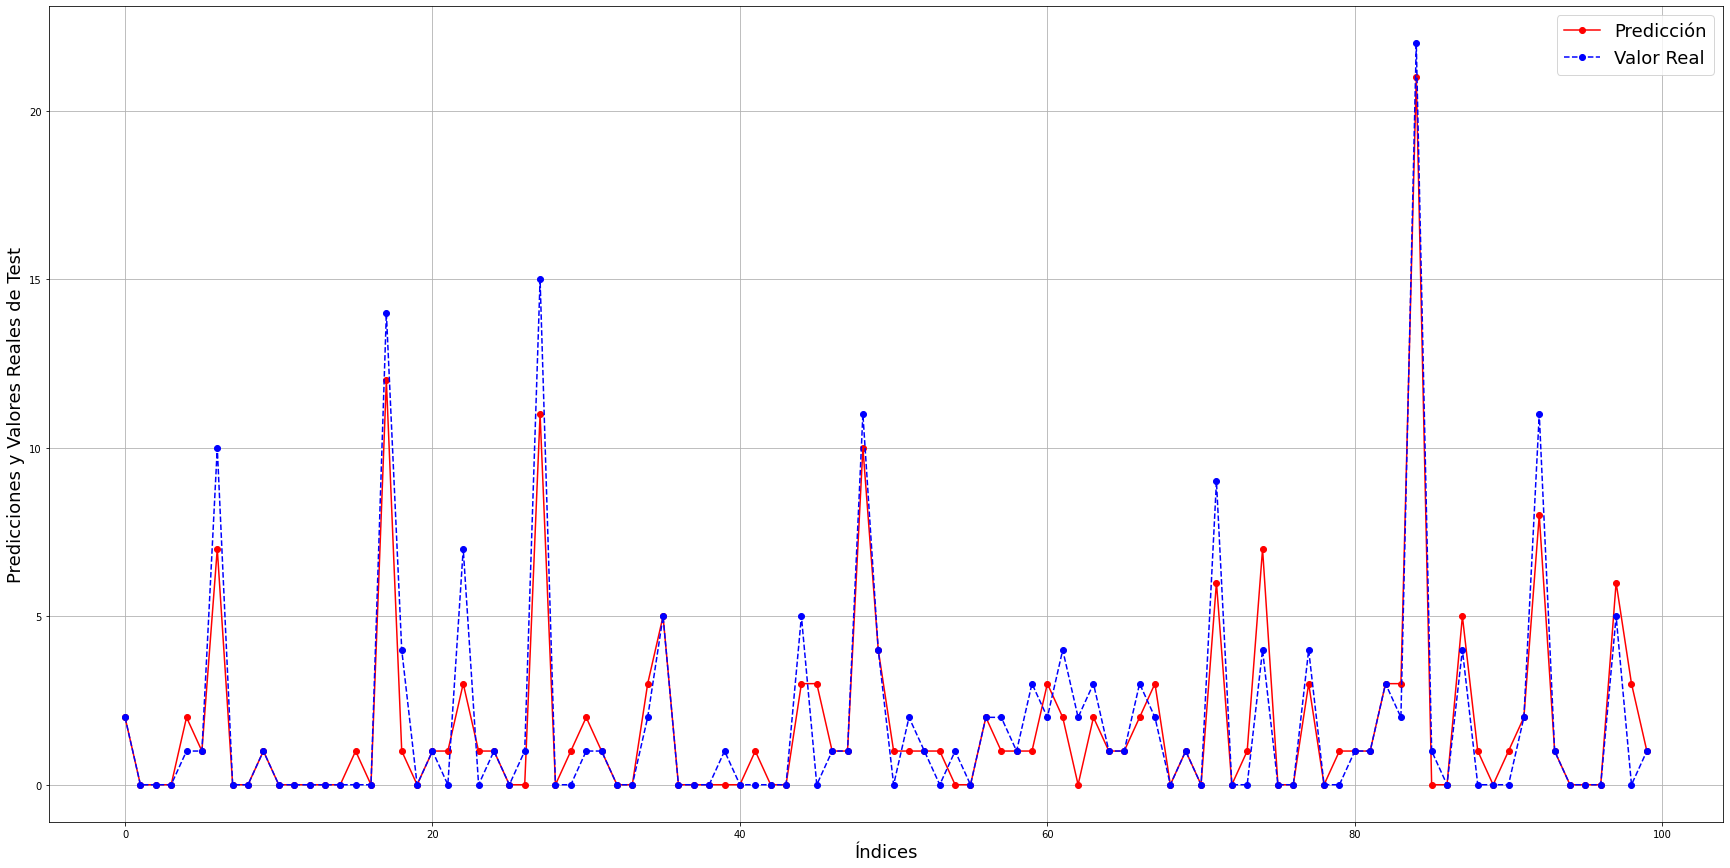

In [20]:
func.muestra_pred(data = y_test, data_pred = np.round(pred_rn,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Prediccion Redes Neur Todos.jpg" )

### Entrenamos el mismo modelo para utilizarlo con las 4 columnas más correladas con el target.

In [7]:
model_corr = keras.models.Sequential([
    keras.layers.Dense(200, activation = 'relu',
                      input_shape = X_train_corr_scal.shape[1:]),
    keras.layers.Dense(100, activation = 'relu'),

    keras.layers.Dense(100, activation = 'relu'),
                                      
    keras.layers.Dense(1, activation = 'relu')
])

model_corr.compile(loss = "mean_squared_error",
             optimizer = "adam",
             metrics = ["mae","mse"])

In [8]:
history = model_corr.fit(X_train_corr_scal,
                   y_train_corr,
                   epochs = 1000,
                   validation_split = 0.2,
                   batch_size = 64,
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/1000
65/65 [==============================] - 1s 3ms/step - loss: 7.0425 - mae: 1.2886 - mse: 7.0425 - val_loss: 2.9642 - val_mae: 0.9290 - val_mse: 2.9642
Epoch 2/1000
65/65 [==============================] - 0s 2ms/step - loss: 2.2476 - mae: 0.8768 - mse: 2.2476 - val_loss: 1.4735 - val_mae: 0.7499 - val_mse: 1.4735
Epoch 3/1000
65/65 [==============================] - 0s 2ms/step - loss: 1.7013 - mae: 0.8050 - mse: 1.7013 - val_loss: 1.4047 - val_mae: 0.7250 - val_mse: 1.4047
Epoch 4/1000
65/65 [==============================] - 0s 2ms/step - loss: 1.6300 - mae: 0.7859 - mse: 1.6300 - val_loss: 1.3070 - val_mae: 0.6884 - val_mse: 1.3070
Epoch 5/1000
65/65 [==============================] - 0s 2ms/step - loss: 1.5902 - mae: 0.7654 - mse: 1.5902 - val_loss: 1.2743 - val_mae: 0.7249 - val_mse: 1.2743
Epoch 6/1000
65/65 [==============================] - 0s 2ms/step - loss: 1.5803 - mae: 0.7675 - mse: 1.5803 - val_loss: 1.2330 - val_mae: 0.6850 - val_mse: 1.2330
Epoch 7/1000
65/

### Realizamos la predicción

In [9]:
pred_rn_corr = model_corr.predict(X_test_corr_scal)

### Mostramos los resultados

In [10]:
func.muestra_metricas(data = y_test_corr, data_pred = pred_rn_corr)

MAE: 0.774256310941175
MSE: 1.525680874914877
RMSE: 1.2351845509537742
R2 score: 0.8879131487756753


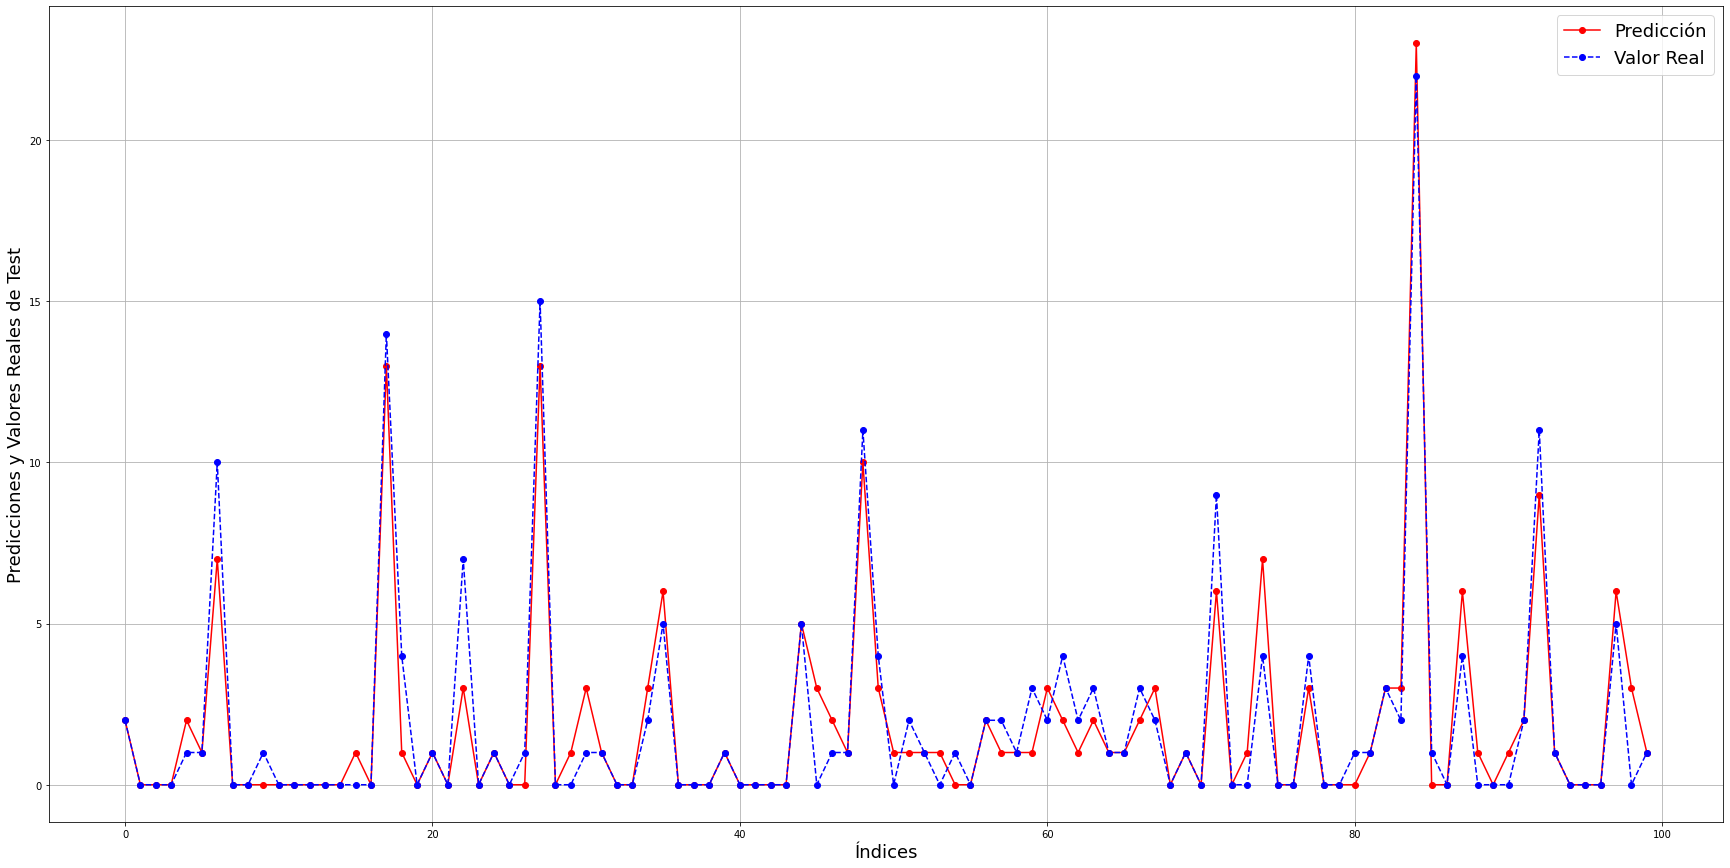

In [19]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_rn_corr,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Prediccion Redes Neur Corr.jpg" )

In [23]:
np.shape(pred_rn_corr)

(1, 1290)

In [24]:
pred_rn_corr = np.reshape(pred_rn_corr, 1290)

In [25]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_rn_corr[70:91],0)}

In [26]:
dict_pred

{'Valor Real': array([ 0.,  9.,  0.,  0.,  4.,  0.,  0.,  4.,  0.,  0.,  1.,  1.,  3.,
         2., 22.,  1.,  0.,  4.,  0.,  0.,  0.]),
 'Predicción': array([ 0.,  5.,  0.,  1.,  6.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  3.,
         3., 22.,  0.,  0.,  5.,  1.,  0.,  1.], dtype=float32)}

In [27]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_rn_corr[70:91],0)}
df_prediccion = pd.DataFrame(dict_pred)
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones rn.csv', sep = ';')
df_prediccion

,Valor Real,Predicción
0,0.0,0.0
1,9.0,5.0
2,0.0,0.0
3,0.0,1.0
4,4.0,6.0
5,0.0,0.0
6,0.0,0.0
7,4.0,3.0
8,0.0,0.0
9,0.0,0.0


### Guardamos nuestro modelo

In [17]:
func.guarda_modelo(modelo = model_corr, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/rn_reg.model")

INFO:tensorflow:Assets written to: ram://576362bb-1c77-4072-9c02-55877f49dc92/assets


NotFoundError: 